In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://drive.google.com/uc?export=download&id=1ckKsAGsm4MWhfg1IezvvgGsjSJGtB3CW"
localPath = "/content/data_balita.csv"

data = pd.read_csv(localPath)
data.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [3]:
# Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(data.head())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0             0     laki-laki          44.591973           stunted
1             0     laki-laki          56.705203            tinggi
2             0     laki-laki          46.863358            normal
3             0     laki-laki          47.508026            normal
4             0     laki-laki          42.743494  severely stunted

Missing Values:
Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


In [4]:
data.rename(columns={
    "Umur (bulan)": "umur_bulan",
    "Jenis Kelamin": "jenis_kelamin",
    "Tinggi Badan (cm)": "tinggi",
    "Status Gizi": "status_gizi"
}, inplace=True)

# Periksa apakah kolom telah diubah
print("Renamed Columns:")
print(data.columns)

Renamed Columns:
Index(['umur_bulan', 'jenis_kelamin', 'tinggi', 'status_gizi'], dtype='object')


In [5]:
# Handle missing values
data = data.dropna()

In [6]:
# Encode categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [7]:
target = pd.get_dummies(data["status_gizi"], prefix="status_gizi")
data = pd.concat([data.drop(columns=["status_gizi"]), target], axis=1)

In [8]:
data.head()

,umur_bulan,jenis_kelamin,tinggi,status_gizi_0,status_gizi_1,status_gizi_2,status_gizi_3
0,0,0,44.591973,False,False,True,False
1,0,0,56.705203,False,False,False,True
2,0,0,46.863358,True,False,False,False
3,0,0,47.508026,True,False,False,False
4,0,0,42.743494,False,True,False,False


In [9]:
# Split features and target
X = data.drop(columns=target.columns)  # Semua kolom kecuali target
y = data[target.columns]  # Kolom target yang telah di-one-hot

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Mengatur input shape di sini
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Save the trained model
model.save("model_balita.h5")

Epoch 1/20
2420/2420 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6594 - loss: 0.8955 - val_accuracy: 0.8885 - val_loss: 0.3969
Epoch 2/20
2420/2420 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9120 - loss: 0.3383 - val_accuracy: 0.9401 - val_loss: 0.2467
Epoch 3/20
2420/2420 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9460 - loss: 0.2233 - val_accuracy: 0.9571 - val_loss: 0.1850
Epoch 4/20
2420/2420 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9604 - loss: 0.1691 - val_accuracy: 0.9620 - val_loss: 0.1530
Epoch 5/20
2420/2420 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9661 - loss: 0.1431 - val_accuracy: 0.9715 - val_loss: 0.1310
Epoch 6/20
2420/2420 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9715 - loss: 0.1218 - val_accuracy: 0.9720 - val_loss: 0.1174
Epoch 7/20
2420/2420 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9746 - loss: 0.1091 - val_accuracy: 0.9692 - val_loss: 0.1093
Epoch 8/20
2420/2420 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9742 - loss: 0.1015 

Test Loss: 0.05585045740008354
Test Accuracy: 0.9870247840881348


In [11]:
# Load trained model
model = tf.keras.models.load_model("model_balita.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,030 (35.28 KB)

 Trainable params: 9,028 (35.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

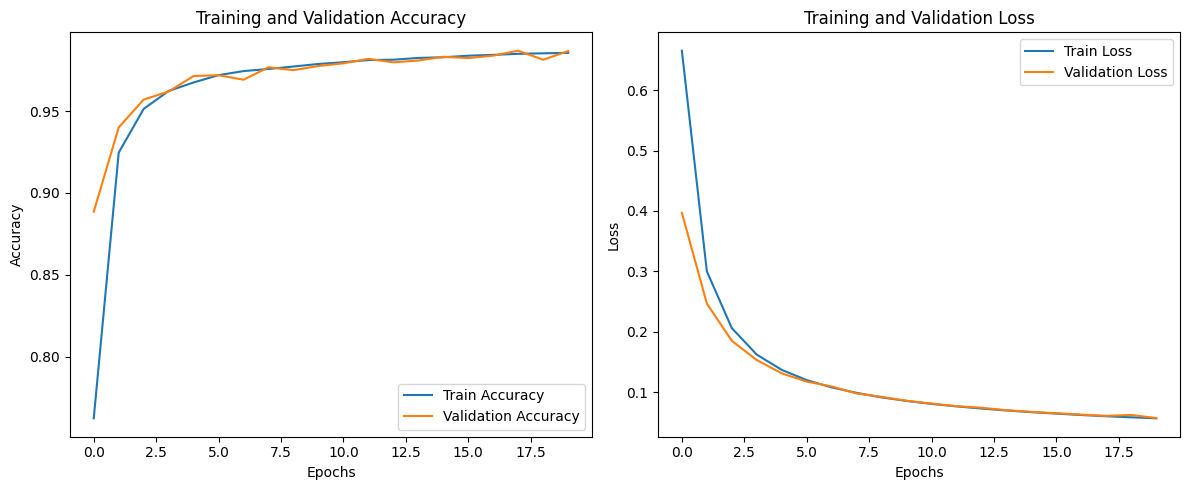

In [12]:
# Plot akurasi
plt.figure(figsize=(12, 5))

# Akurasi Training dan Validation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss Training dan Validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


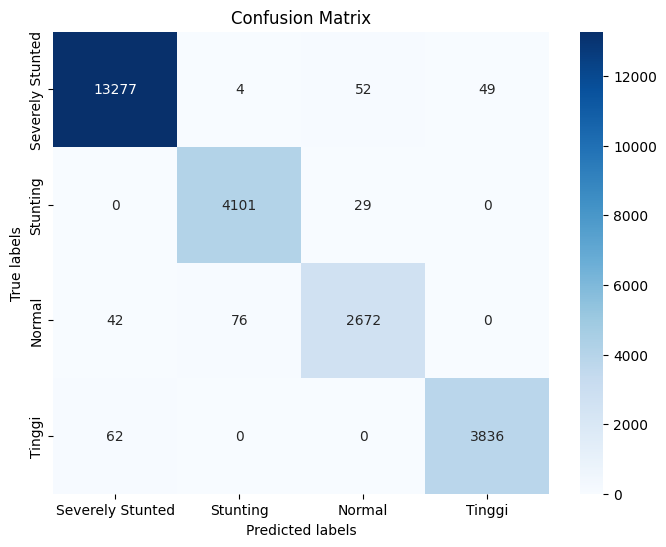

In [13]:
from sklearn.metrics import confusion_matrix

# Prediksi pada data uji
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)  # Mengambil indeks kelas dengan probabilitas tertinggi

# Ubah y_test ke format label asli jika one-hot encoded
if isinstance(y_test, pd.DataFrame):
    y_true = y_test.values.argmax(axis=1)
else:
    y_true = y_test.argmax(axis=1)  # Jika y_test sudah berupa array NumPy

# Label untuk Confusion Matrix
ticklabels = ["Severely Stunted", "Stunting", "Normal", "Tinggi"]

# Buat Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=ticklabels, yticklabels=ticklabels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# Buat laporan klasifikasi
report = classification_report(y_true, y_pred, target_names=ticklabels)

# Cetak laporan
print("Classification Report:")
print(report)


Classification Report:
                  precision    recall  f1-score   support

Severely Stunted       0.99      0.99      0.99     13382
        Stunting       0.98      0.99      0.99      4130
          Normal       0.97      0.96      0.96      2790
          Tinggi       0.99      0.98      0.99      3898

        accuracy                           0.99     24200
       macro avg       0.98      0.98      0.98     24200
    weighted avg       0.99      0.99      0.99     24200



In [21]:
# Prepare input data
input_data = {
    "umur_bulan": 13,
    "jenis_kelamin": "perempuan",
    "tinggi": 73
}

# Convert input data to DataFrame
input_df = pd.DataFrame([input_data])

# Encode categorical features
input_df['jenis_kelamin'] = label_encoders['jenis_kelamin'].transform(input_df['jenis_kelamin'])

# Ensure the order of columns matches the original training data
input_df = input_df[["umur_bulan", "jenis_kelamin", "tinggi"]]

# Scale the input data
input_array_scaled = scaler.transform(input_df)

In [22]:
# Mapping indeks ke label deskriptif
class_labels = ["Normal", "Severaly Stunting", "Stunting", "Tinggi"]

# Predict
prediction = model.predict(input_array_scaled)

# Interpret prediction
predicted_class_index = np.argmax(prediction)  # Indeks kelas dengan probabilitas tertinggi
predicted_class_label = class_labels[predicted_class_index]  # Label deskriptif

# Print results
print(f"Prediction (raw probabilities): {prediction[0]}")
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class: {predicted_class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction (raw probabilities): [9.9995649e-01 1.7123064e-13 4.3503594e-05 6.4800526e-12]
Predicted class index: 0
Predicted class: Normal
